# Create Face Regcogntion of Idol face from youtube from image datasets

https://www.kaggle.com/datasets/rossellison/kpop-idol-faces

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install facenet-pytorch
!pip install opendatasets
# Clean up the notebook
clean_notebook()


Notebook cleaned.


# Download Dataset

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rossellison/kpop-idol-faces")

Skipping, found downloaded files in "./kpop-idol-faces" (use force=True to force download)


# List Idol groups

In [3]:
import os
import pandas as pd

# Path to the 'Kpop_Faces' directory
base_path = './kpop-idol-faces/Kpop_Faces'

# Initialize a dictionary to store data
data = {}

# Check if the directory exists
if os.path.exists(base_path):
    # List all group folders
    groups = [group for group in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, group))]
    
    for group in groups:
        # Get the full path of each group
        group_path = os.path.join(base_path, group)
        # List all idols in the group folder
        idols = [idol for idol in os.listdir(group_path) if os.path.isdir(os.path.join(group_path, idol))]
        # Add group and idol names to the dictionary
        data[group] = idols

    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(data, orient='index').transpose()

    # Rename the columns to include the group name in the first column
    df.columns.name = "Idol Group"
else:
    print(f"The directory {base_path} does not exist!")


df

Idol Group,stayc,red_velvet,apink,izone,Loona,Momoland,HelloVenus,wondergirls,exid,lesserafim,...,afterschool,lightsum,bibi,secret,tara,billlie,itzy,aoa,ohmygirl,everglow
0,seeun,yeri,None,None,yves,hyebin,nara,sunmi,hani,sakura,...,nana,None,None,jieun,jiyeon,haruna,lia,choa,yooa,aisha
1,yoon,irene,None,None,chuu,nancy,lime,None,None,eunchae,...,None,None,None,None,eunjung,moonsua,yeji,yuna,None,onda
2,j,joy,None,None,choerry,yeonwoo,None,None,None,yunjin,...,None,None,None,None,None,sheon,chaeryeong,hyejeong,None,sihyeon
3,sumin,seulgi,None,None,jinsoul,None,None,None,None,kazuha,...,None,None,None,None,None,tsuki,yuna,seolhyun,None,yiren
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,ryujin,None,None,eu
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,mia
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# Random Selected Idols

In [7]:
import os
import random 
import pandas as pd


# Path to the 'Kpop_Faces' directory
base_path = './kpop-idol-faces/Kpop_Faces'

def get_idol_data(group_name):
    """
    Function to fetch idol member names and image URLs for a given group.
    """
    group_path = os.path.join(base_path, group_name)
    
    if not os.path.exists(group_path):
        return f"The group '{group_name}' does not exist in the dataset."
    
    # Fetch idol members (subfolders) and their images
    idols = []
    for idol in os.listdir(group_path):
        idol_path = os.path.join(group_path, idol)
        if os.path.isdir(idol_path):
            # Fetch image URLs (relative paths)
            images = [os.path.join(idol_path, img) for img in os.listdir(idol_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            idols.append({'idol_name': idol, 'image_urls': images})
    
    # Convert to DataFrame for a tabular view
    idol_df = pd.DataFrame(idols)
    return idol_df


# Input idol group name
group_name =  random.choice(df.columns)
print(f"Fetching data for the idol group: {group_name}")

# Fetch and display the idol members and image URLs
idol_data = get_idol_data(group_name)
idol_data['num_images'] = idol_data['image_urls'].apply(len)

idol_data 

Fetching data for the idol group: aoa


,idol_name,image_urls,num_images
0,choa,[./kpop-idol-faces/Kpop_Faces/aoa/choa/95790_D...,4
1,yuna,[./kpop-idol-faces/Kpop_Faces/aoa/yuna/286225_...,1
2,hyejeong,[./kpop-idol-faces/Kpop_Faces/aoa/hyejeong/285...,2
3,seolhyun,[./kpop-idol-faces/Kpop_Faces/aoa/seolhyun/286...,15


Fetching data for the idol group: fx


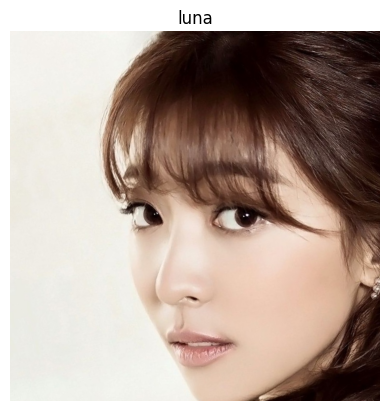

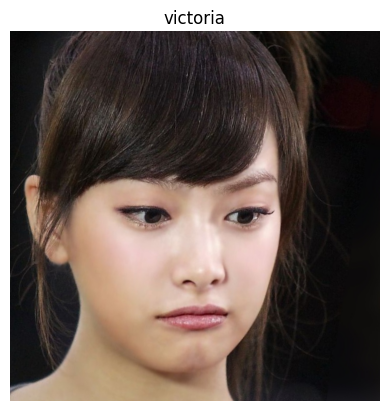

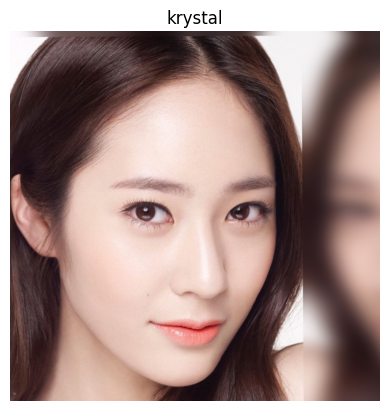

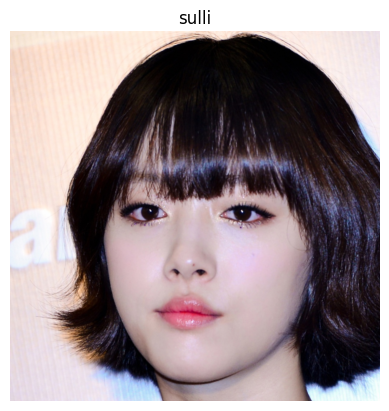

,idol_name,image_urls,num_images
0,luna,[./kpop-idol-faces/Kpop_Faces/fx/luna/286225_p...,2
1,victoria,[./kpop-idol-faces/Kpop_Faces/fx/victoria/1383...,3
2,krystal,[./kpop-idol-faces/Kpop_Faces/fx/krystal/19891...,11
3,sulli,[./kpop-idol-faces/Kpop_Faces/fx/sulli/198916_...,15


In [10]:
import os
import random 
from PIL import Image
import matplotlib.pyplot as plt

def display_one_image_per_idol(idol_data):
    """
    Display at least one image for every idol in the idol_data DataFrame.
    """
    if idol_data.empty:
        print("The idol_data DataFrame is empty.")
        return
    
    for _, row in idol_data.iterrows():
        idol_name = row['idol_name']
        image_urls = row['image_urls']
        
        if not image_urls:
            print(f"No images found for {idol_name}. Skipping...")
            continue
        
        # Select the first image URL
        image_path = image_urls[0]
        
        # Check if the image exists
        if not os.path.exists(image_path):
            print(f"Image not found for {idol_name}: {image_path}. Skipping...")
            continue
        
        # Display the image
        image = Image.open(image_path)
        plt.figure()  # Create a new figure for each image
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.title(f"{idol_name}")
        plt.show()



# Input idol group name
group_name =  random.choice(df.columns)
print(f"Fetching data for the idol group: {group_name}")

# Fetch and display the idol members and image URLs
idol_data = get_idol_data(group_name)
# Call the function to display images
display_one_image_per_idol(idol_data)
idol_data['num_images'] = idol_data['image_urls'].apply(len)
idol_data 